In [260]:
import pandas as pd

# Load the CSV into a DataFrame
breast_cancer = pd.read_csv("./proba1.csv", header=0, delimiter=',')

# Check the shape of the DataFrame
print("Shape of the DataFrame:", breast_cancer.shape)


Shape of the DataFrame: (1500, 22)


In [261]:
# remove spaces and symbols to avoid problems with statsmodel GLM
breast_cancer.columns = [c.lower().strip().replace(' ','_').replace('/','_').replace('-','_') 
                                for c in breast_cancer.columns] 

# change the type of categorical variables into category
categorical_columns = list(breast_cancer.dtypes[breast_cancer.dtypes == 'O'].index.values)
for column in categorical_columns:
    breast_cancer[column] = breast_cancer[column].astype('category')

NOSE PERQUE SERVEIX

In [262]:
# change the type of categorical variables into category
categorical_columns = list(breast_cancer.dtypes[breast_cancer.dtypes == 'O'].index.values)
for column in categorical_columns:
    breast_cancer[column] = breast_cancer[column].astype('category')
# Define the custom order for each categorical variable
t_stage_order = ['T1', 'T2', 'T3', 'T4']
n_stage_order = ['N1', 'N2', 'N3']
stage_6_order = ['IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC']
differentiate_order = ['Undifferentiated', 'Poorly differentiated', 'Moderately differentiated', 'Well differentiated']


# Apply the custom order to the categorical variables
breast_cancer['t_stage'] = pd.Categorical(breast_cancer['t_stage'], categories=t_stage_order, ordered=True)
breast_cancer['n_stage'] = pd.Categorical(breast_cancer['n_stage'], categories=n_stage_order, ordered=True)
breast_cancer['6th_stage'] = pd.Categorical(breast_cancer['6th_stage'], categories=stage_6_order, ordered=True)
breast_cancer['differentiate'] = pd.Categorical(breast_cancer['differentiate'], categories=differentiate_order, ordered=True)


In [247]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age                        1500 non-null   int64   
 1   race                       1500 non-null   category
 2   marital_status             1500 non-null   category
 3   t_stage                    1500 non-null   category
 4   n_stage                    1500 non-null   category
 5   6th_stage                  1500 non-null   category
 6   differentiate              1500 non-null   category
 7   a_stage                    1500 non-null   category
 8   tumor_size                 1500 non-null   int64   
 9   estrogen_status            1500 non-null   category
 10  progesterone_status        1500 non-null   category
 11  regional_node_examined     1500 non-null   int64   
 12  regional_node_positive     1500 non-null   int64   
 13  survival_months            1500 n

In [248]:
breast_cancer.head()

,age,race,marital_status,t_stage,n_stage,6th_stage,differentiate,a_stage,tumor_size,estrogen_status,...,regional_node_positive,survival_months,status,months_since_last_checkup,tumor_volume,age_at_diagnosis,positive_lymph_ratio,age_group,race_group,tumor_stage_group
0,48,Other,Single,T2,N1,IIB,Moderately differentiated,Regional,23,Positive,...,1,106,Alive,10,6370.626303,40,0.111111,Young,Non-Caucasian,Advanced Stage
1,47,White,Married,T2,N1,IIB,Poorly differentiated,Regional,39,Positive,...,1,49,Dead,1,31059.355770,43,0.034483,Young,Caucasian,Advanced Stage
2,65,White,Married,T1,N1,IIA,Well differentiated,Regional,8,Positive,...,1,48,Alive,0,268.082573,61,0.500000,Elderly,Caucasian,Early Stage
3,49,Black,Separated,T1,N3,IIIC,Well differentiated,Distant,12,Positive,...,10,14,Dead,2,904.778684,48,0.625000,Young,Non-Caucasian,Early Stage
4,49,White,Divorced,T2,N1,IIB,Moderately differentiated,Regional,38,Positive,...,3,4,Dead,4,28730.912015,49,0.200000,Young,Caucasian,Advanced Stage


In [203]:
breast_cancer.describe(include='all')

,age,race,marital_status,t_stage,n_stage,6th_stage,differentiate,a_stage,tumor_size,estrogen_status,progesterone_status,regional_node_examined,regional_node_positive,survival_months,status,months_since_last_checkup,tumor_volume,age_at_diagnosis,positive_lymph_ratio,tnm_stage_with_a_stage
count,1500.000000,1500,1500,1500,1500,1500,1500,1500,1500.000000,1500,1500,1500.000000,1500.000000,1500.000000,1500,1500.000000,1.500000e+03,1500.000000,1500.000000,1500
unique,NaN,3,5,4,3,5,4,2,NaN,2,2,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,7
top,NaN,White,Married,T2,N1,IIIA,Moderately differentiated,Regional,NaN,Positive,Positive,NaN,NaN,NaN,Alive,NaN,NaN,NaN,NaN,IIIA_Regional
freq,NaN,1260,940,675,880,437,839,1450,NaN,1346,1176,NaN,NaN,NaN,884,NaN,NaN,NaN,NaN,437
mean,54.157333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.673333,NaN,NaN,14.402000,5.088000,63.558000,NaN,5.470000,5.152699e+04,49.316667,0.380574,NaN
std,9.109989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.025850,NaN,NaN,8.101779,5.929111,25.961843,NaN,3.437777,1.235044e+05,9.484111,0.309291,NaN
min,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,2.000000,NaN,0.000000,5.235988e-01,24.000000,0.027027,NaN
25%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,NaN,NaN,9.000000,1.000000,48.000000,NaN,3.000000,2.572441e+03,42.000000,0.125000,NaN
50%,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,14.000000,3.000000,64.000000,NaN,5.000000,8.181231e+03,49.000000,0.263158,NaN
75%,62.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,19.000000,6.000000,84.000000,NaN,8.000000,3.351032e+04,57.000000,0.589325,NaN


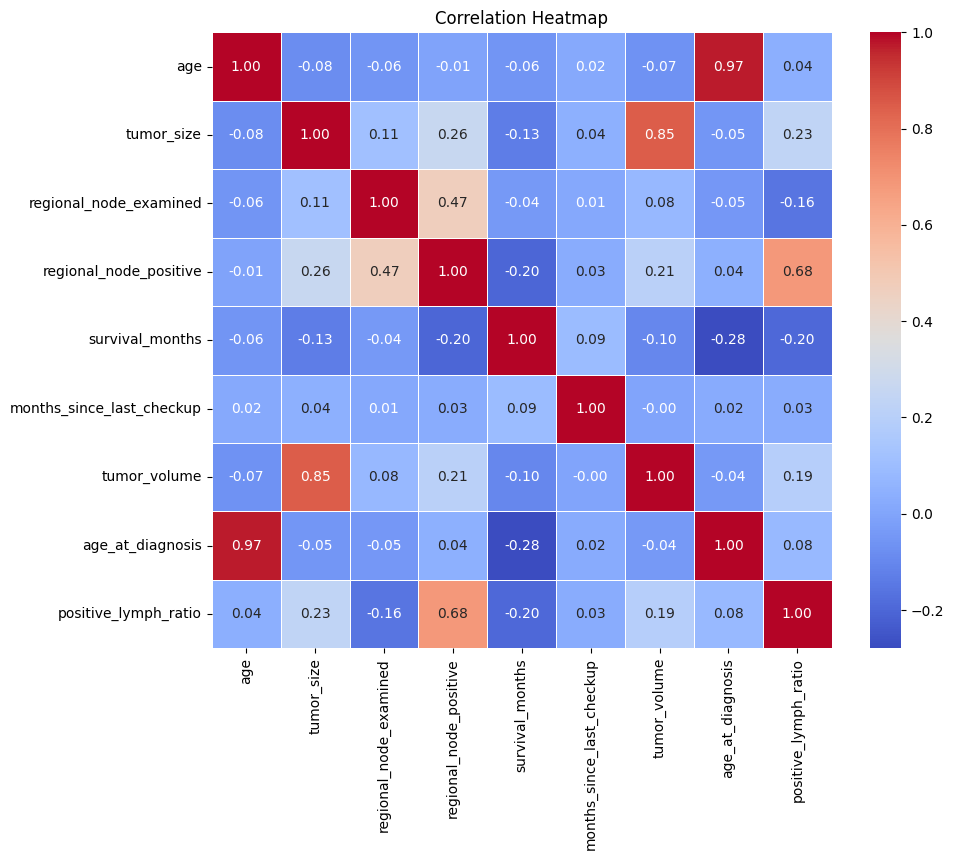

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

def correlation_heatmap(data):
    # Select only numeric columns
    numeric_data = data.select_dtypes(include='number')
    
    # Calculate the correlation matrix
    corr = numeric_data.corr()

    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

# Call the function with your DataFrame
correlation_heatmap(breast_cancer)



In [250]:
breast_cancer = breast_cancer.drop(["regional_node_examined", "regional_node_positive",'t_stage', 'n_stage', '6th_stage', 'a_stage'], axis=1)


breast_cancer.shape

(1500, 16)

### Dataset Splits

In [264]:
from sklearn.model_selection import train_test_split

X = breast_cancer.loc[:, breast_cancer.columns != 'status']
y = breast_cancer['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Preprocessing

In [265]:
from scipy.stats import boxcox

# Apply Box-Cox transformation to the "tumor_size" column in the training set
X_train['tumor_size'] = boxcox(X_train['tumor_size'])[0]

# Apply Box-Cox transformation to the "tumor_size" column in the test set
X_test['tumor_size'] = boxcox(X_test['tumor_size'])[0]

In [266]:
import matplotlib.pyplot as plt

def plot_histogram(data, column, color, title):
    plt.figure(figsize=(8, 6))
    plt.hist(data[column], color=color, bins=20)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

# Example usage:
# plot_histogram(X_train, 'tumor_size', '#648E9C', 'Histogram of Transformed Tumor Size in Training Set')


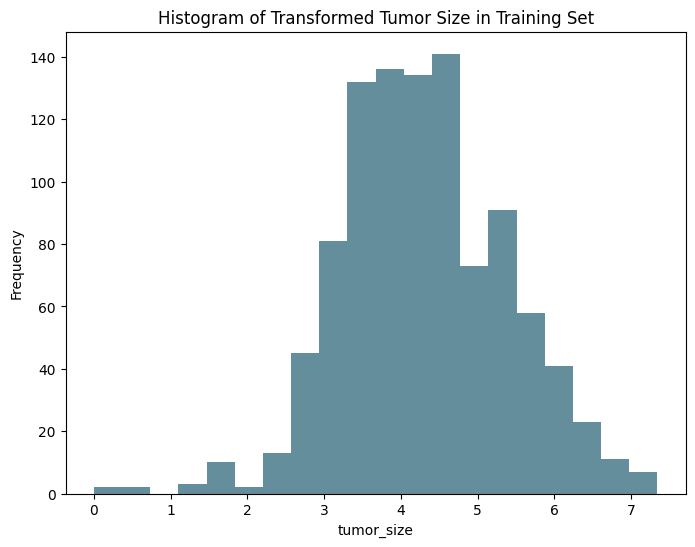

In [236]:

plot_histogram(X_train, 'tumor_size', '#648E9C', 'Histogram of Transformed Tumor Size in Training Set')

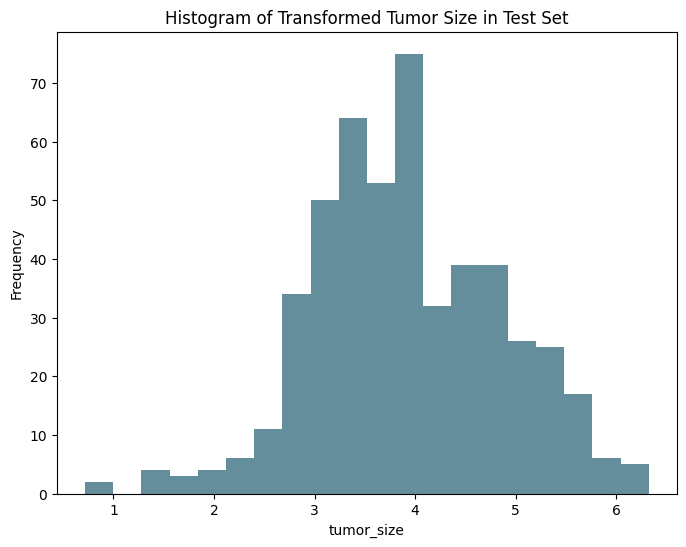

In [237]:
plot_histogram(X_test, 'tumor_size', '#648E9C', 'Histogram of Transformed Tumor Size in Test Set')

In [267]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


def preprocessing(X, y, scaler=None):
    print('Original shape:{}'.format(X.shape))
    categorical_columns =X.dtypes[X.dtypes == 'category'].index.values
    numerical_columns = [c for c in X.columns if c not in categorical_columns]
    
    # Scale numerical variables
    if scaler is None: 
        # We only want the scaler to fit the train data
        scaler = MinMaxScaler()
        #scaler = StandardScaler()
        X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
    else: 
        X[numerical_columns] = scaler.transform(X[numerical_columns])
    
    # Apply one hot encoding to categorical variables
    for column in categorical_columns:
        X_one_hot = pd.get_dummies(X[column], prefix=column)
        X = X.merge(X_one_hot,left_index=True,right_index=True)
        X = X.drop(columns=[column])
    
    # Drop missings
    X=X.dropna()
    y=y[X.index]
    print('New shape:{}'.format(X.shape))
    return X, y, scaler


X_train, y_train, scaler = preprocessing(X_train,y_train)
X_test, y_test, _ = preprocessing(X_test,y_test,scaler)



Original shape:(1005, 21)
New shape:(1005, 46)
Original shape:(495, 21)
New shape:(495, 46)


In [268]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import RandomOverSampler

np.random.seed(666)

# Apply Random Oversampling to balance the dataset
oversampler = RandomOverSampler()
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Define the models and their hyperparameter grids
models = {
    'Logistic Regression': (LogisticRegression(solver='liblinear'), {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10],'class_weight': [None,'balanced']}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [5, 10],'class_weight': [None, 'balanced']}),
    'SVM': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'class_weight': ['balanced']}),
    'Gradient Boosting': (GradientBoostingClassifier(), {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.01, 0.001],}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [5, 10], 'min_samples_split': [2, 5, 10],'class_weight': [None, 'balanced']}),
    'Naive Bayes': (GaussianNB(), {}),   
}

# Define a custom scoring function to calculate precision, recall, F1-score
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, pos_label='Alive'),
    'recall': make_scorer(recall_score, pos_label='Alive'),
    'f1_score': make_scorer(f1_score, pos_label='Alive')
}

# Perform cross-validation and hyperparameter tuning for each model
results = {}
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring, refit='accuracy')
    grid_search.fit(X_train_resampled, y_train_resampled)
    
    # Get the mean cross-validated scores for each metric
    cv_results = grid_search.cv_results_
    mean_scores = {
        'Accuracy': cv_results['mean_test_accuracy'][grid_search.best_index_],
        'Precision': cv_results['mean_test_precision'][grid_search.best_index_],
        'Recall': cv_results['mean_test_recall'][grid_search.best_index_],
        'F1-score': cv_results['mean_test_f1_score'][grid_search.best_index_]
    }
    
    results[model_name] = {
        'Best Hyperparameters': grid_search.best_params_,
        **mean_scores,
        'Validation Errors': cv_results['std_test_accuracy'][grid_search.best_index_]
    }

# Create a dataframe to store the results
df_results = pd.DataFrame(results).transpose()
df_results.index.name = 'Model'


In [269]:
df_results['Best Hyperparameters']['Random Forest']

{'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 300}

In [270]:
df_results

,Best Hyperparameters,Accuracy,Precision,Recall,F1-score,Validation Errors
Model,,,,,,
Logistic Regression,"{'C': 1, 'class_weight': None, 'penalty': 'l2'}",0.7775,0.764649,0.803333,0.782797,0.014337
Random Forest,"{'class_weight': 'balanced', 'max_depth': 10, ...",0.845833,0.841092,0.86,0.849029,0.036228
SVM,"{'C': 10, 'class_weight': 'balanced', 'kernel'...",0.799167,0.802293,0.796667,0.798704,0.020138
Gradient Boosting,"{'learning_rate': 0.1, 'n_estimators': 300}",0.826667,0.836237,0.818333,0.826345,0.043189
KNN,"{'n_neighbors': 7, 'weights': 'distance'}",0.7725,0.816547,0.726667,0.764002,0.061441
Decision Tree,"{'class_weight': None, 'max_depth': 10, 'min_s...",0.7925,0.803817,0.778333,0.789981,0.030437
Naive Bayes,{},0.681667,0.639922,0.845,0.726487,0.037786


Random Forest Classifier - Test Results
---------------------------------
Accuracy: 0.8061
Precision: 0.8092
Recall: 0.8662
F1-score: 0.8367
---------------------------------
Confusion Matrix:
Predicted Value  Alive  Dead
True Value                  
Alive              246    38
Dead                58   153


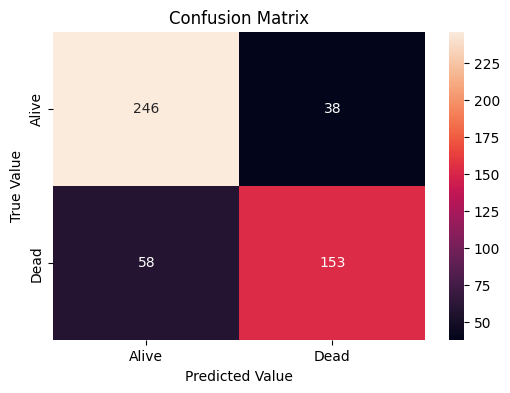

In [271]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Define the best hyperparameters for Random Forest
best_rf_params = {'class_weight': 'balanced','max_depth': 10, 'n_estimators': 200}

# Create and fit the best Random Forest model
best_rf_model = RandomForestClassifier(**best_rf_params)

# Fit the model and obtain the training and validation loss
best_rf_model.fit(X_train_resampled, y_train_resampled)

# Use the fitted model to make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the performance of the model on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Alive')
recall = recall_score(y_test, y_pred, pos_label='Alive')
f1 = f1_score(y_test, y_pred, pos_label='Alive')
confusion_mat = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['Alive', 'Dead']

# Create a labeled confusion matrix with indicators
confusion_mat_labeled = pd.DataFrame(confusion_mat, index=class_labels, columns=class_labels)
confusion_mat_labeled.index.name = 'True Value'
confusion_mat_labeled.columns.name = 'Predicted Value'

# Print the performance metrics and labeled confusion matrix
print("Random Forest Classifier - Test Results")
print("---------------------------------")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("---------------------------------")
print("Confusion Matrix:")
print(confusion_mat_labeled)


# Plot the labeled confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat_labeled, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show();


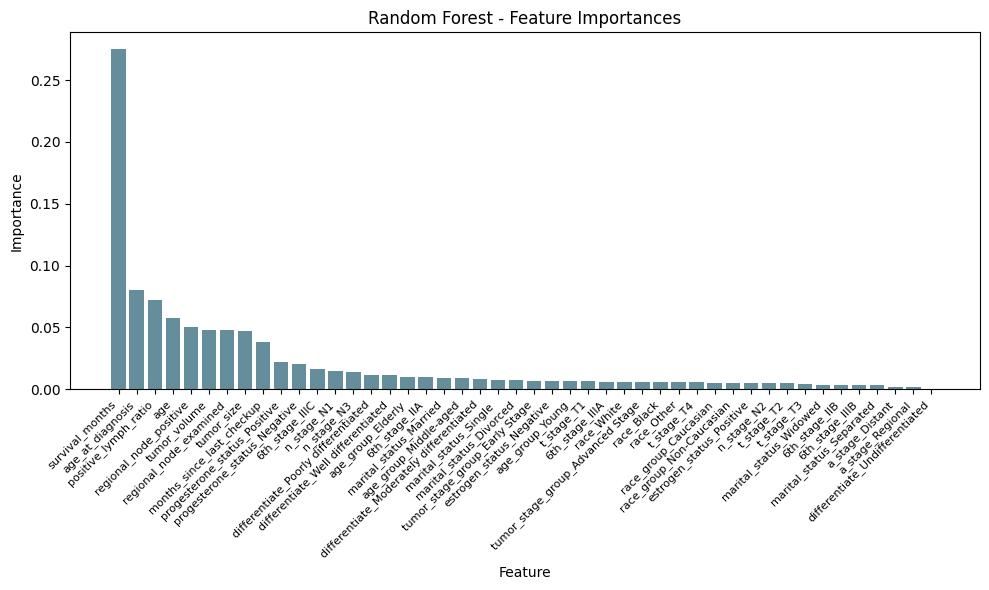

In [272]:
# Get feature importances from the best Random Forest model
feature_importances = best_rf_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]

# Get the names of the features
feature_names = X_train.columns[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), sorted_feature_importances, color='#648E9C')
plt.xticks(range(len(feature_importances)), feature_names, rotation=45, ha='right', fontsize=8)
plt.title('Random Forest - Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show();